In [578]:
% matplotlib notebook
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
gdp = pd.read_csv('C:\\Users\\manish.h.verma\\OneDrive - Accenture\\Desktop\\gdp.csv')

In [579]:
gdp = gdp[['year', 'value']]
gdp = gdp.query('year>=2009')
gdp['year'] = gdp.year.astype('str')
gdp.rename(columns={'value': 'GDP($M)'}, inplace=True)

In [580]:
cpi = pd.read_csv('C:\\Users\\manish.h.verma\\OneDrive - Accenture\\Desktop\\consumer-price-index.csv')
cpi = cpi.loc[cpi.level_2.isin(['Food', 'Transport', 'Clothing & Footwear', 'Education', 'Health Care'])]
cpi['value'] = cpi.value.astype('float', inplace=True)
cpi['year'] = cpi.month.str.slice(0,4)
cpi.drop(columns=['level_1', 'month'], inplace=True)
cpi = cpi.query('value != "na"')
cpi['value'] = cpi.value.astype('float', inplace=True)
cpi.rename(columns={'level_2': 'index', 'value':'consumer_price_value'}, inplace=True)
cpi_agg = cpi.pivot_table(values='consumer_price_value', index='year', columns='index', aggfunc='mean')

In [581]:
gdp_cpi = gdp.merge(cpi_agg, on = 'year',how ='inner')

In [582]:
# gdp_cpi = gdp_cpi.set_index('year', drop=True)

In [583]:
# import pylab
# from pylab import rcParams
# import matplotlib.dates as mdates

# plt.style.use('seaborn-bright')

# gdp_cpi = gdp_cpi.reset_index()
# gdp_cpi = gdp_cpi.rename(columns={"index":"year"})

# pylab.rcParams['figure.figsize'] = (10, 5) 

# ax = gdp_cpi.plot(secondary_y = ['Clothing & Footwear', 'Education', 'Food', 'Health Care', 'Transport'], 
#                    grid = True, linestyle = '--', 
#                    xticks=gdp_cpi.index)

# ax.set_xticklabels(gdp_cpi["year"])
# ax.set_xlabel('Year')
# ax.set_ylabel('GDP ($ Million)');


<IPython.core.display.Javascript object>


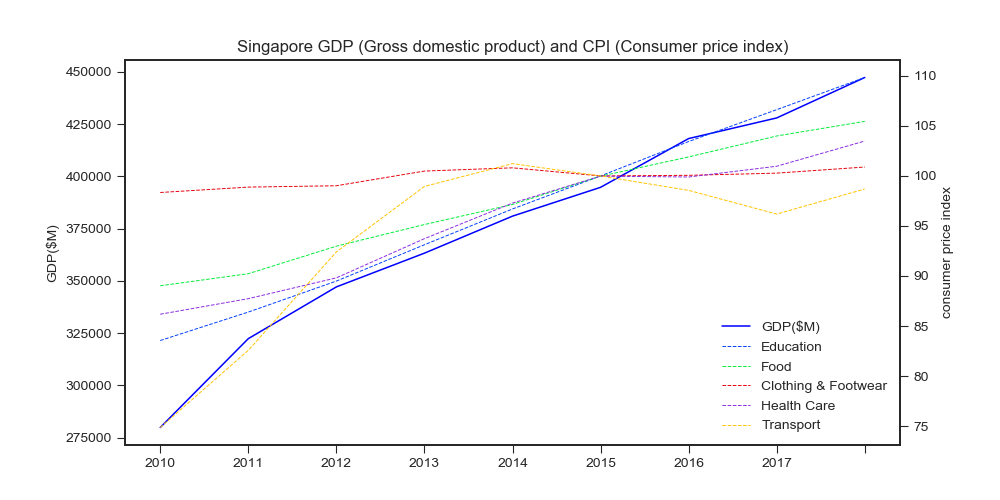

In [588]:
df = gdp_cpi.copy()
fig=plt.figure(figsize=(10,5))
plt.title('Singapore GDP (Gross domestic product) and CPI (Consumer price index)')
plt.style.use('seaborn-bright')

x = df.year

ax1 = df['GDP($M)'].plot(style='b', label='GDP($M)', linewidth=1.1)
ax1.set_xticklabels(df["year"])
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP($M)')


ax2 = df['Education'].plot(secondary_y=True, label='Education', linestyle = '--', linewidth=0.7)
ax3 = df['Food'].plot(secondary_y=True, label='Food', linestyle = '--',  linewidth=0.7)
ax4 = df['Clothing & Footwear'].plot(secondary_y=True, label='Clothing & Footwear', linestyle = '--', linewidth=0.7)
ax5 = df['Health Care'].plot(secondary_y=True, label='Health Care', linestyle = '--',  linewidth=0.7)
ax5 = df['Transport'].plot(secondary_y=True,  label='Transport', linestyle = '--',  linewidth=0.7)

#style='g',

ax3.set_ylabel('consumer price index')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.show()
